In [24]:
from pynytimes import NYTAPI
import pandas as pd
import glob
from ast import literal_eval
import matplotlib.pyplot as plt
plt.style.use('dark_background')
pd.options.display.max_colwidth = 100
import nltk
from nltk.corpus import stopwords
import re
from collections import Counter
from nytimes_scraper.nyt_api import NytApi
from nytimes_scraper.comments import fetch_comments_by_article, comments_to_df
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
nyt = NYTAPI("RCKjYsVCct7hlziZ7QUeQpNE3Qw7zIZz", parse_dates=True)

In [5]:
top_stories = nyt.top_stories()
df = pd.DataFrame.from_dict(top_stories)

In [7]:
most_viewed = nyt.most_viewed(days = 30)
df = pd.DataFrame.from_dict(most_viewed)

In [9]:
# Initialize API with your key
nyt = NYTAPI("RCKjYsVCct7hlziZ7QUeQpNE3Qw7zIZz", parse_dates=True)

# Search for articles related to EVs
ev_articles = nyt.article_search(
    query="electric vehicle OR EV",
    results=50  # Fetch up to 20 articles
)

# Convert to DataFrame
df_ev = pd.DataFrame(ev_articles)

# Select relevant columns
df_ev_filtered = df_ev[['headline', 'abstract', 'web_url', 'pub_date', 'section_name']]

# Display results
import pandas as pd
pd.options.display.max_colwidth = 200  # Expand column width for better readability
df_ev_filtered.head(20)

csv_file_path = "/Users/rez/Desktop/Advanced Programming/Lecture 4/evarticles.csv"
df_ev_filtered.to_csv(csv_file_path, index=False)

print(f"CSV file saved at: {csv_file_path}")

df_ev_filtered.head(10)

CSV file saved at: /Users/rez/Desktop/Advanced Programming/Lecture 4/evarticles.csv


,headline,abstract,web_url,pub_date,section_name
0,"{'main': 'How Much Do You Really Know About Electric Vehicles?', 'kicker': None, 'content_kicker': None, 'print_headline': None, 'name': None, 'seo': None, 'sub': None}",It’s time to do a little fact-checking. \nTest your knowledge about electric cars.,https://www.nytimes.com/paidpost/electrify-america/electrify-america-normal-now/how-much-do-you-really-know-about-electric-vehicles.html,2022-02-22 14:05:09+00:00,T Brand
1,"{'main': 'Carmakers Pull Plug On Electric Vehicles', 'kicker': None, 'content_kicker': None, 'print_headline': 'Carmakers Pull Plug On Electric Vehicles', 'name': None, 'seo': None, 'sub': None}",General Motors and Ford are taking back electric cars when leases expire and refuse to sell vehicles to leaseholders; are moving on to new technologies and do not want to be liable for any problem...,https://www.nytimes.com/2004/03/28/automobiles/carmakers-pull-plug-on-electric-vehicles.html,2004-03-28 05:00:00+00:00,Automobiles
2,"{'main': 'Yours For The Next Few Hours: An EV?', 'kicker': 'Green', 'content_kicker': None, 'print_headline': None, 'name': None, 'seo': None, 'sub': None}","This is a show where green cars have taken center stage. And even though it did not star at a news conference, the Future Toyota Electric Vehicle — or FTEV for short — is drawing plenty of attention.",https://green.blogs.nytimes.com/2009/01/13/yours-for-the-next-few-hours-an-ev/,2009-01-13 12:35:06+00:00,Science
3,"{'main': 'BEHIND THE WHEEL/General Motors EV1, Toyota RAV4-EV, Honda EV Plus; Charge! Doing an Electric Commute', 'kicker': None, 'content_kicker': None, 'print_headline': 'BEHIND THE WHEEL/Genera...","Article on electric vehicles General Motors EV1, Toyota RAV4-EV and Honda EV Plus; photos (M)",https://www.nytimes.com/1998/07/26/automobiles/behind-wheel-general-motors-ev1-toyota-rav4-ev-honda-ev-plus-charge-doing.html,1998-07-26 05:00:00+00:00,Automobiles
4,"{'main': 'Live From the Detroit Auto Show, an EV Command Center', 'kicker': 'Green', 'content_kicker': None, 'print_headline': None, 'name': None, 'seo': None, 'sub': None}","Jalopnik, the popular automotive blog, customized a GEM electric vehicle to transport its writers around the show floor at the Cobo Convention Center.",https://green.blogs.nytimes.com/2009/01/13/live-from-the-detroit-auto-show-an-ev-command-center/,2009-01-13 18:01:32+00:00,Science
5,"{'main': 'Finding Easier Ways to Charge Electric Vehicles', 'kicker': None, 'content_kicker': None, 'print_headline': 'Finding Easier Ways to Charge Electric Cars', 'name': None, 'seo': None, 'sub...","With high numbers of apartment dwellers, New York, along with other cities, represents the promise and challenge of the untapped market for electric vehicles.",https://www.nytimes.com/2015/04/24/business/finding-easier-ways-to-charge-electric-vehicles.html,2015-04-23 09:00:09+00:00,Business Day
6,"{'main': 'Leased and Abandoned: Revolt of the EV-1 Lovers', 'kicker': 'CALIFORNIA/MOTOR CITY', 'content_kicker': None, 'print_headline': 'CALIFORNIA/MOTOR CITY; Leased and Abandoned: Revolt of the...","People who leased Saturn EV-1 electric cars organize to fight company's plan to take all EV-1's out of private hands when last leases expire in August 2004; company, which began leasing EV-1's in ...",https://www.nytimes.com/2003/10/22/automobiles/california-motor-city-leased-and-abandoned-revolt-of-the-ev-1-lovers.html,2003-10-22 05:00:00+00:00,Automobiles
7,"{'main': 'Behind the Quiet State-by-State Fight Over Electric Vehicles', 'kicker': None, 'content_kicker': None, 'print_headline': 'The State-by-State Assault on Electric Cars', 'name': None, 'seo...","While the battle in Washington gets much of the attention, the most direct attack against electric vehicles is being waged in statehouses.",https://www.nytimes.com/2017/03/11/business/energy-environment/electric-cars-hybrid-tax-credits.html,2017-03-11 10:00:18+00:00,Business Day
8,"{'main': 'Ford Relents, Allowing Ranger 

In [11]:
# ✅ Initialize NYT API (Replace with your actual API Key)
nyt = NYTAPI("RCKjYsVCct7hlziZ7QUeQpNE3Qw7zIZz", parse_dates=True)

# ✅ Fetch EV-related articles
ev_articles = nyt.article_search(
    query="electric vehicle OR EV",
    results=25  # Fetch up to 25 articles
)

# ✅ Convert API response to DataFrame
df_ev = pd.DataFrame(ev_articles)

# ✅ Select relevant columns
df_ev_filtered = df_ev[['headline', 'abstract', 'web_url', 'pub_date', 'section_name']].copy()

# ✅ Extract text safely from 'headline' (handling dictionary format)
df_ev_filtered['headline'] = df_ev_filtered['headline'].apply(lambda x: x.get('main') if isinstance(x, dict) else x)

# ✅ Ensure 'abstract' is a string (some may be NaN or dicts)
df_ev_filtered['abstract'] = df_ev_filtered['abstract'].astype(str)

# ✅ Define a more comprehensive list of stopwords
stop_words = set([
    "the", "is", "and", "or", "to", "for", "in", "on", "of", "a", "an", "with", "by", 
    "this", "that", "are", "very", "said", "more", "from", "at", "it", "was", "be", 
    "which", "as", "will", "its", "also", "about", "but", "new", "one", "would", "two",
    "first", "just", "may", "can", "year", "time", "other", "has", "have", "their", "they",
    "there", "some", "many", "so", "been", "into", "after", "before", "any", "you", "your",
    "several", "general", "models", "seconds", "60", "s", "zero", "rav4", "isnt", "most"
])

# ✅ Function to clean text & extract keywords (removes single-character words)
def extract_keywords(text):
    if not isinstance(text, str):  # Ensure text is a string
        return []
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = text.split()  # Tokenize text
    return [word for word in words if word not in stop_words and len(word) > 1]  # Remove stopwords & single characters

# ✅ Apply keyword extraction to headline and abstract
df_ev_filtered['keywords'] = df_ev_filtered['headline'].apply(extract_keywords) + df_ev_filtered['abstract'].apply(extract_keywords)

# ✅ Flatten keyword list & count occurrences
all_keywords = [word for sublist in df_ev_filtered['keywords'] for word in sublist]
keyword_counts = Counter(all_keywords)

# ✅ Convert to DataFrame & filter common keywords
keyword_df = pd.DataFrame(keyword_counts.items(), columns=['Keyword', 'Count']).sort_values(by='Count', ascending=False)
keyword_df = keyword_df[keyword_df['Count'] >= 2]  # Keep only keywords appearing 2+ times

# ✅ Reset index to show ordered 1,2,3... instead of default Pandas index
keyword_df.reset_index(drop=True, inplace=True)
keyword_df.index += 1  # Start index from 1 instead of 0

# ✅ Display top 25 keywords
print(keyword_df.head(25))

# ✅ Save results to a CSV file
csv_filename = "/Users/rez/Desktop/Advanced Programming/Lecture 4/filtered_ev_keyword_frequency.csv"
keyword_df.to_csv(csv_filename, index=False)

       Keyword  Count
1     electric     52
2         cars     23
3     vehicles     17
4           ev     15
5      vehicle     12
6          car      8
7      company      7
8       motors      6
9          not      5
10      charge      5
11  technology      5
12  automotive      5
13       honda      5
14        plan      5
15         ev1      5
16      photos      4
17        home      4
18        show      4
19      toyota      4
20      future      3
21      almost      3
22      center      3
23   attention      3
24        auto      3
25       model      3


CSV file saved: /Users/rez/Desktop/Advanced Programming/Lecture 4/filtered_ev_keyword_frequency.csv


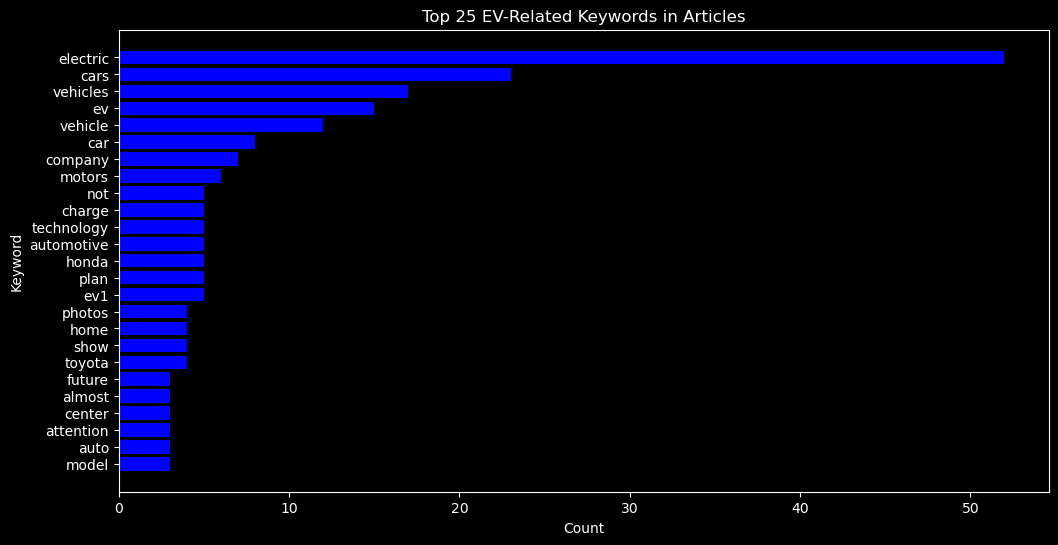

In [13]:
print(f"CSV file saved: {csv_filename}")

# ✅ Plot bar chart of top 25 keywords
top_keywords = keyword_df.head(25)

plt.figure(figsize=(12, 6))
plt.barh(top_keywords['Keyword'], top_keywords['Count'], color='blue')
plt.xlabel("Count")
plt.ylabel("Keyword")
plt.title("Top 25 EV-Related Keywords in Articles")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

In [15]:
import pandas as pd
from nytimes_scraper.nyt_api import NytApi
from nytimes_scraper.comments import fetch_comments_by_article, comments_to_df

def read_urls_from_csv(file_path):
    """
    Reads a CSV file and extracts article URLs and titles.
    
    Parameters:
    file_path (str): Path to the CSV file containing article URLs.
    
    Returns:
    pd.DataFrame: A DataFrame containing article URLs and titles.
    """
    df = pd.read_csv(file_path)
    df.columns = df.columns.str.strip()  # Remove spaces in column names
    
    # Check column names
    print("Columns in the CSV file:", df.columns)
    
    # Adjust column names based on actual data
    if "web_url" in df.columns and "headline" in df.columns:
        articles_df = df[['web_url', 'headline']].copy()
    elif "url" in df.columns and "title" in df.columns:
        articles_df = df[['url', 'title']].copy()
    else:
        raise ValueError("CSV file is missing required columns ('web_url' or 'headline')")
    
    return articles_df

def process_comment_thread(comment, article_url, article_title, all_comments):
    """
    Recursively process a comment and its replies, adding article metadata to each.
    
    Parameters:
    comment (dict): The comment to process.
    article_url (str): The URL of the article.
    article_title (str): The title of the article.
    all_comments (list): List to store all processed comments.
    """
    # Add article metadata to the current comment
    comment['article_url'] = article_url
    comment['article_title'] = article_title
    
    # Store the processed comment
    all_comments.append(comment)
    
    # Process replies if they exist
    if 'replies' in comment and isinstance(comment['replies'], list):
        for reply in comment['replies']:
            process_comment_thread(reply, article_url, article_title, all_comments)

def fetch_comments_for_urls(api, articles_df):
    """
    Fetch comments for articles and preserve article metadata for all comments and replies.
    
    Parameters:
    api (NytApi): An instance of the NytApi class.
    articles_df (pd.DataFrame): DataFrame containing article URLs and titles.
    
    Returns:
    List[dict]: A list of comment dictionaries with article metadata.
    """
    all_comments = []
    
    for _, article in articles_df.iterrows():
        url = article['web_url']
        title = article['headline']
        
        try:
            print(f"Fetching comments for: {title} ({url})")
            comments = fetch_comments_by_article(api, url)
            
            # Process each top-level comment and its replies
            if comments:
                for comment in comments:
                    process_comment_thread(comment, url, title, all_comments)
            else:
                print(f"No comments found for: {title}")
                
        except Exception as e:
            print(f"Error fetching comments for {url}: {e}")
    
    return all_comments

def save_comments_to_csv(comments, output_file):
    """
    Save comments with article metadata to a CSV file.
    
    Parameters:
    comments (List[dict]): A list of comment dictionaries with article metadata.
    output_file (str): Path to the output CSV file.
    """
    if comments:
        # Convert the comments to a DataFrame
        comment_df = comments_to_df(comments)
        
        # Ensure article metadata columns are first
        metadata_cols = ['article_url', 'article_title']
        other_cols = [col for col in comment_df.columns if col not in metadata_cols]
        comment_df = comment_df[metadata_cols + other_cols]
        
        # Save the DataFrame to a CSV file
        comment_df.to_csv(output_file, index=False)
        print(f"✅ Comments saved to {output_file}")
        
        # Print summary statistics
        print(f"\n📊 Summary:")
        print(f"🔹 Total comments collected: {len(comment_df)}")
        print(f"🔹 Articles with comments: {comment_df['article_url'].nunique()}")
        print(f"🔹 Top-level comments: {len(comment_df[comment_df['parentID'].isna()])}")
        print(f"🔹 Replies: {len(comment_df[comment_df['parentID'].notna()])}")
        
        # Check for missing metadata
        missing_metadata = comment_df[comment_df['article_url'].isna() | comment_df['article_title'].isna()]
        if not missing_metadata.empty:
            print(f"⚠️ Warning: {len(missing_metadata)} comments are missing article metadata")
    else:
        print("❌ No comments found!")

def main(input_csv, output_csv, api_key):
    """
    Main function to orchestrate the comment collection process.
    
    Parameters:
    input_csv (str): Path to the input CSV file containing article URLs.
    output_csv (str): Path to the output CSV file to save comments.
    api_key (str): NYTimes API key.
    """
    api = NytApi(api_key)
    
    # Read article URLs
    articles_df = read_urls_from_csv(input_csv)
    print(f"✅ Loaded {len(articles_df)} articles from {input_csv}")
    
    # Fetch comments
    comments = fetch_comments_for_urls(api, articles_df)
    
    # Save to CSV
    save_comments_to_csv(comments, output_csv)

# Example usage
if __name__ == "__main__":
    input_csv = "/Users/rez/Desktop/Advanced Programming/Lecture 4/evarticles.csv"  # Update with your actual path
    output_csv = "/Users/rez/Desktop/Advanced Programming/Lecture 4/ev_comments.csv"
    api_key = "RCKjYsVCct7hlziZ7QUeQpNE3Qw7zIZz"  # Replace with your actual API key
    
    main(input_csv, output_csv, api_key)

Columns in the CSV file: Index(['headline', 'abstract', 'web_url', 'pub_date', 'section_name'], dtype='object')
✅ Loaded 50 articles from /Users/rez/Desktop/Advanced Programming/Lecture 4/evarticles.csv
Fetching comments for: {'main': 'How Much Do You Really Know About Electric Vehicles?', 'kicker': None, 'content_kicker': None, 'print_headline': None, 'name': None, 'seo': None, 'sub': None} (https://www.nytimes.com/paidpost/electrify-america/electrify-america-normal-now/how-much-do-you-really-know-about-electric-vehicles.html)
No comments found for: {'main': 'How Much Do You Really Know About Electric Vehicles?', 'kicker': None, 'content_kicker': None, 'print_headline': None, 'name': None, 'seo': None, 'sub': None}
Fetching comments for: {'main': 'Carmakers Pull Plug On Electric Vehicles', 'kicker': None, 'content_kicker': None, 'print_headline': 'Carmakers Pull Plug On Electric Vehicles', 'name': None, 'seo': None, 'sub': None} (https://www.nytimes.com/2004/03/28/automobiles/carmaker

/opt/anaconda3/lib/python3.12/site-packages/nytimes_scraper/comments/postprocessing.py:21: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df[col] = pd.to_datetime(df[col], unit='s')
/opt/anaconda3/lib/python3.12/site-packages/nytimes_scraper/comments/postprocessing.py:21: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df[col] = pd.to_datetime(df[col], unit='s')
/opt/anaconda3/lib/python3.12/site-packages/nytimes_scraper/comments/postprocessing.py:21: FutureWarning: The behavior of 't

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/rez/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Columns found in CSV: ['article_url', 'article_title', 'status', 'commentSequence', 'userID', 'userDisplayName', 'userLocation', 'userTitle', 'userURL', 'picURL', 'commentTitle', 'commentBody', 'createDate', 'updateDate', 'approveDate', 'recommendations', 'replyCount', 'editorsSelection', 'parentID', 'parentUserDisplayName', 'depth', 'commentType', 'trusted', 'recommendedFlag', 'permID', 'isAnonymous']
Sentiment analysis complete. Results saved to ev_comments_sentiment.csv


/var/folders/ls/pwxlsvpj63520s08tlhcs11r0000gn/T/ipykernel_18782/2013735949.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, order=['positive', 'neutral', 'negative'], palette='viridis')


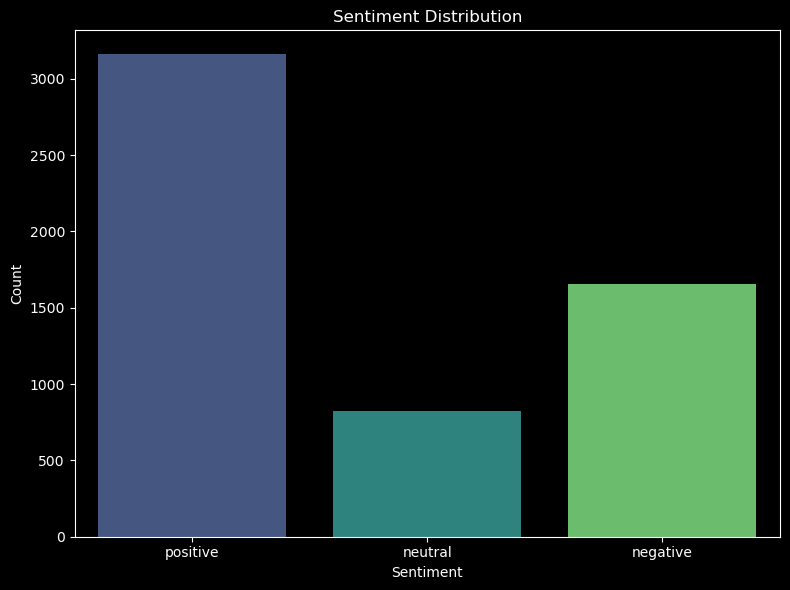

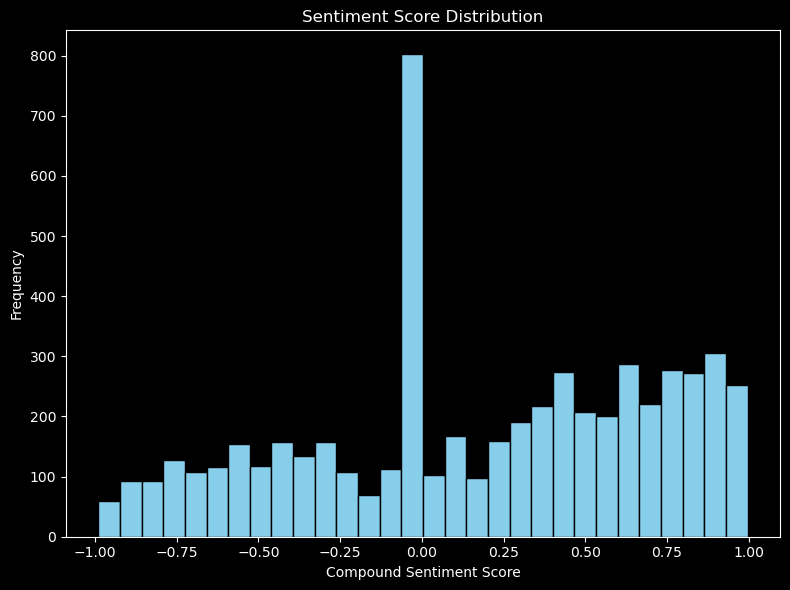

In [28]:

# Download the VADER lexicon if not already present
nltk.download('vader_lexicon')

def clean_text(text):
    """
    Clean the comment text by removing URLs, punctuation,
    and extra whitespace, and convert to lowercase.
    """
    text = re.sub(r'http\S+', '', text)          # Remove URLs
    text = re.sub(r'[^A-Za-z0-9\s]+', '', text)    # Remove punctuation and special characters
    return text.lower().strip()

def analyze_sentiment(text, analyzer):
    """
    Compute the compound sentiment score for a given text.
    """
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']

def classify_sentiment(score):
    """
    Classify sentiment as positive, negative, or neutral based on compound score.
    """
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'

def visualize_sentiments(df):
    """
    Create visualizations for sentiment analysis:
    - A bar chart for the sentiment distribution.
    - A histogram for the distribution of sentiment scores.
    """
    # Bar chart for sentiment counts
    plt.figure(figsize=(8, 6))
    sns.countplot(x='sentiment', data=df, order=['positive', 'neutral', 'negative'], palette='viridis')
    plt.title('Sentiment Distribution')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
    
    # Histogram for sentiment score distribution
    plt.figure(figsize=(8, 6))
    plt.hist(df['sentiment_score'], bins=30, edgecolor='black', color='skyblue')
    plt.title('Sentiment Score Distribution')
    plt.xlabel('Compound Sentiment Score')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

def main():
    # Load the comments CSV (adjust the file path if needed)
    comments_df = pd.read_csv("ev_comments.csv")
    
    # Print available columns to verify the CSV structure
    print("Columns found in CSV:", comments_df.columns.tolist())
    
    # Determine the correct column name for the comment text
    if 'comment' in comments_df.columns:
        comment_col = 'comment'
    elif 'body' in comments_df.columns:
        comment_col = 'body'
    elif 'commentBody' in comments_df.columns:
        comment_col = 'commentBody'
    else:
        raise ValueError("No valid comment text column found in CSV. Columns available: " + ", ".join(comments_df.columns))
    
    # Clean the comment text using the determined column name
    comments_df['clean_comment'] = comments_df[comment_col].astype(str).apply(clean_text)
    
    # Initialize the VADER sentiment analyzer
    sia = SentimentIntensityAnalyzer()
    
    # Calculate the compound sentiment score for each comment
    comments_df['sentiment_score'] = comments_df['clean_comment'].apply(lambda x: analyze_sentiment(x, sia))
    
    # Classify each comment as positive, negative, or neutral
    comments_df['sentiment'] = comments_df['sentiment_score'].apply(classify_sentiment)
    
    # Save the enhanced DataFrame to a new CSV file
    output_file = "ev_comments_sentiment.csv"
    comments_df.to_csv(output_file, index=False)
    print(f"Sentiment analysis complete. Results saved to {output_file}")
    
    # Visualize the sentiment analysis results
    visualize_sentiments(comments_df)

if __name__ == "__main__":
    main()
